In [1]:
import numpy as np
import h5py
from inverse_MPS import constructInverse
from tensor_networks import MPS, MPStensorProduct
from data_acquisition import generateShadow
from expectation_estimation import shallowEstimation, sparseEstimation

import matplotlib.pyplot as plt

In [2]:
n_qubits=4
depth=3

In [3]:

inverse_bond_dimension=3
target_accuracy=1e-13
inverse_file_name='data/inverses/M_inverse_n='+str(n_qubits//2)+'_d='+str(depth)+'_chi'+str(inverse_bond_dimension)

constructInverse(n_qubits//2, depth, inverse_bond_dimension, target_accuracy, inverse_file_name, verbose=True, regularize=True)

Distance from inverse: 2.6645352591003757e-15

In [37]:
state=MPS(size=n_qubits//2, bond_dimension=2, physical_dimension=4)
for i in range(state.getSize()):
    state.setVector(i,0,0, [1/2**(1/n_qubits),0,0,0])
    state.setVector(i,0,1, [0,0,0,0])
    state.setVector(i,1,0, [0,0,0,0])
    state.setVector(i,1,1,[0,0,0,1/2**(1/n_qubits)])

shadow_file_name='data/shadows/shadow_n='+str(n_qubits)+'_d='+str(depth)
generateShadow(state, depth, 1000, shadow_file_name, verbose=True, clifford=False)

Generated 1000 out of 1000 snapshots.

In [38]:
observable=MPStensorProduct(state,state)

output_file_name='data/estimations/GHZ_n='+str(n_qubits//2)+'_d='+str(depth)
shallowEstimation(shadow_file_name, inverse_file_name,observable, output_file_name, verbose=True)

estimations=h5py.File(output_file_name, 'r')["estimations"][:]


Generated 1000 out of 1000 estimations.

(1.0016304472806379+3.084338340286763e-18j)


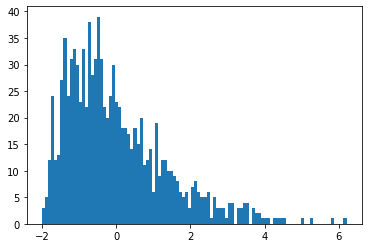

In [39]:
plt.hist(np.real(estimations-1), 100)
print(np.mean(estimations))

In [25]:
paulis=[[3,3,3,0,0,0,0,0], [0,3,3,3,0,0,0,0], [0,0,3,3,3,0,0,0], [0,0,0,3,3,3,0,0], [0,0,0,0,3,3,3,0],
        [0,0,0,0,0,3,3,3],[3,0,0,0,0,0,3,3], [3,3,0,0,0,0,0,3]]+[[int(x==i) for x in range(n_qubits)] for i in range(n_qubits)]

coefficients=[1]*len(paulis)
shadow_file_name='data/shadows/shadow_n='+str(n_qubits)+'_d='+str(depth)

output_file_name='data/estimations/pauli_n='+str(n_qubits)+'_d='+str(depth)
sparseEstimation(paulis, coefficients, depth, shadow_file_name, output_file_name, verbose=True)

estimations=h5py.File(output_file_name, 'r')["estimations"][:]

Generated 1000 out of 1000 estimations.

(0.44928696496777787+1.5880490352095406e-16j)


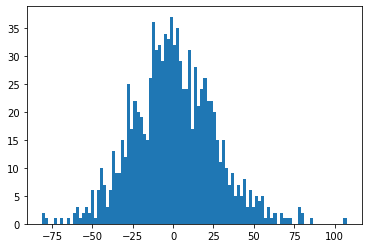

In [26]:
plt.hist(np.real(estimations), 100)
print(np.mean(estimations))

In [ ]:
estimations

In [ ]:
a=[2]

In [ ]:
x=[a for r in range(4)]

In [ ]:
x[0]=[3]

In [21]:
output_file.close()

NameError: name 'output_file' is not defined

In [5]:
int(True)

1